<a href="https://colab.research.google.com/github/angelarwa/TIL/blob/master/QRCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1월 14일

In [0]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline

# QR 코드 관련 작업을 위한 3가지
import imutils
import qrcode # QR코드 생성기
from pyzbar.pyzbar import decode # OpenCV 4.0 이상부터는 QR코드를 인식할 수 있음
    # QR코드와 바코드 모두 인식할 수 있는 라이브러리

# 동영상을 Update 해서 plot 하는 역할
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    
    fig = plt.figure(figsize = (30, 10))
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl",
               width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

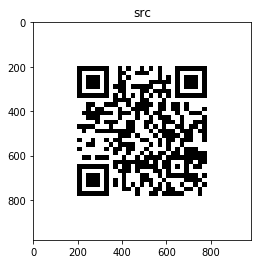

<Figure size 2160x720 with 0 Axes>

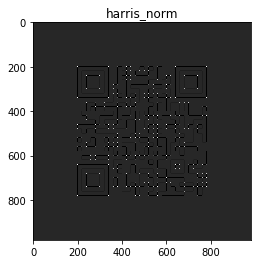

<Figure size 2160x720 with 0 Axes>

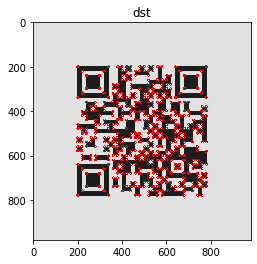

<Figure size 2160x720 with 0 Axes>

In [0]:
# 이 방식을 이용하면 QR코드를 사용할 수 있음

src = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)

harris = cv2.cornerHarris(src, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

(1060, 1060, 3) (1060, 1060)
0


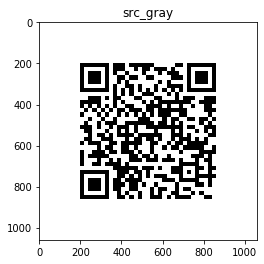

<Figure size 2160x720 with 0 Axes>

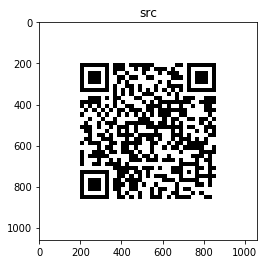

<Figure size 2160x720 with 0 Axes>

In [0]:
# fast 방식 이용

src = cv2.imread('./datas/acronet.png')
src_g = cv2.imread('./datas/acronet.png', cv2.COLOR_GRAY2BGR)
print(src.shape, src_g.shape)

fast = cv2.FastFeatureDetector_create(2)
keypoints = fast.detect(src) # Gray 이미지에서 코너점을 추출하고
print(len(keypoints))

for kp in keypoints :
    pt = (int(kp.pt[0]), int(kp.pt[1])) 
    cv2.circle(src_g, pt, 5, (0, 0, 255), 2) # 원본 이미지에 출력
    
imshow('src_gray', src_g)
imshow('src', src)

In [0]:
pip install qrcode

Note: you may need to restart the kernel to use updated packages.


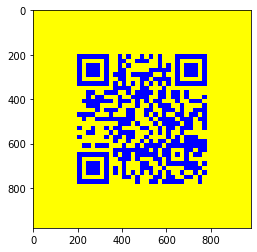

<Figure size 2160x720 with 0 Axes>

In [0]:
# QR 코드 관련 패키지
# 관련 패키지 설치 했으니까 import 시키기 위해서 맨 위 셀에 qr 관련 주석 해제하고 실행

# QR 코드를 표준화 된 규칙에 맞춰 생성하는 것
qr = qrcode.QRCode(version = 2, error_correction = qrcode.constants.ERROR_CORRECT_H,
                   box_size = 20, border = 10) # QR코드의 크기를 지정
url = 'https://www.kaggle.com/' # 이동할 링크를 저장
qr.add_data(url) # 링크를 QR의 데이터에 저장
qr.make() # QR 생성하는 함수

img = qr.make_image(fill_color="blue", back_color="yellow") # 꼭 블랙&화이트일 필요는 없음
plt.imshow(img, cmap="gray") # 어차피 내부 연산 처리할 때 바이너리화 하기 때문에

img.save("QR_Code.png") # QR코드 저장하고

img = cv2.imread("QR_Code.png") 
cv2.imwrite("3.png", img) # 파일로 저장하기
imshow("", img)

https://www.kaggle.com/
[[[200. 200.]]

 [[779. 200.]]

 [[779. 779.]]

 [[200. 779.]]]


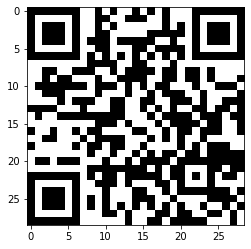

<Figure size 2160x720 with 0 Axes>

In [0]:
# QR코드 인식하기

image = cv2.imread('QR_Code.png') # 저장한 QR코드 이미지 불러오기
qrDecoder = cv2.QRCodeDetector() # QR코드 내용을 해독하는 함수(OpenCV 4.0 이상부터 지원)

data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)
# QR코드 영역을 찾아서 디코드하는 함수, 3가지 값을 반환
print(data) # (QR코드 안에 있는 데이터)
print(bbox) # (박스에서 어느 영역에 QR코드가 있는지, 좌표 값 4개)
# print(rectifiedImage) # (입력받은 QR코드 영역만의 정방향 이미지)
imshow('', rectifiedImage)

C190000009916|25541
[[[ 200.      830.    ]]

 [[ 549.      832.    ]]

 [[ 549.     1183.0232]]

 [[ 197.9886 1180.9884]]]


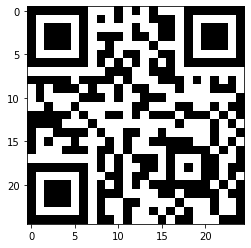

<Figure size 2160x720 with 0 Axes>

In [0]:
# 멀티캠퍼스 출입하는 QR 확인

image = cv2.imread('mulcamQR.png') # 저장한 QR코드 이미지 불러오기
qrDecoder = cv2.QRCodeDetector() # QR코드 내용을 해독하는 함수(OpenCV 4.0 이상부터 지원)
# 링크 참고 : https://docs.opencv.org/3.4/de/dc3/classcv_1_1QRCodeDetector.html

data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)
print(data)
print(bbox)
imshow('', rectifiedImage)

In [0]:
# QR 코드의 일부분에 손실이 있으면 인식하지 못함
# 블러를 어느정도 해도 인식하지만, 특정 수준 이상의 노이즈가 발생하면 에러

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

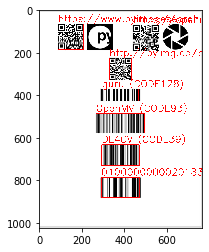

<Figure size 2160x720 with 0 Axes>

In [0]:
from pyzbar.pyzbar import decode
# pyzbar는 QR코드말고도 바코드까지 인식할 수 있음

image = cv2.imread('./datas/barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect # 각 코드마다의 좌표 값을 가져와서
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType) # 데이터 내용을 출력
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                1.5, (0, 0, 255), 2) 
    
imshow("", image)